# Plotting

---

This notebook is part of https://github.com/risc-mi/catabra.

This short example demonstrates CaTabRa's built-in plotting capabilities:
* [create plots in Python](#Create-Plots-in-Python),
* [create interactive plots with plotly](#Create-Interactive-Plots-with-plotly).

For a more thorough account on plotting in CaTabRa, please refer to [plots.md](https://github.com/risc-mi/catabra/doc/plots.md).

Familiarity with CaTabRa's main data analysis workflow is assumed. A step-by-step introduction can be found in [Workflow.ipynb](https://github.com/risc-mi/catabra/examples/Workflow.ipynb).

## Create Plots in Python

When analyzing data and evaluating or explaining prediction models, CaTabRa automatically plots some of the results and saves the resulting figures as png, pdf or other files. For a more fine-grained control of plotting, there is also a Python API.

Let's start with analyzing some data.

In [1]:
# load dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(as_frame=True, return_X_y=True)

In [2]:
# add target labels to DataFrame
X['diagnosis'] = y

In [3]:
# split into train- and test set by adding column with corresponding values
# the name of the column is arbitrary; CaTabRa tries to "guess" which samples belong to which set based on the column name and -values
X['train'] = X.index <= 0.8 * len(X)

In [4]:
from catabra.analysis import analyze

analyze(
    X,
    classify='diagnosis',     # name of column containing classification target
    split='train',            # name of column containing information about the train-test split (optional)
    time=1,                   # time budget for hyperparameter tuning, in minutes (optional)
    out='plotting_example',
)

[CaTabRa] ### Analysis started at 2023-02-07 15:36:33.907452
[CaTabRa] Saving descriptive statistics completed
[CaTabRa] Using AutoML-backend auto-sklearn for binary_classification
[CaTabRa] Successfully loaded the following auto-sklearn add-on module(s): xgb


/home/amaletzk/miniconda3/envs/catabra/lib/python3.9/site-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/home/amaletzk/miniconda3/envs/catabra/lib/python3.9/site-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


[CaTabRa] New ensemble fitted:
    ensemble_val_roc_auc: 0.980337
    n_constituent_models: 1
    total_elapsed_time: 00:05
[CaTabRa] New model #1 trained:
    val_roc_auc: 0.980337
    val_accuracy: 0.927152
    val_balanced_accuracy: 0.928416
    train_roc_auc: 1.000000
    type: random_forest
    total_elapsed_time: 00:05
[CaTabRa] New ensemble fitted:
    ensemble_val_roc_auc: 0.994744
    n_constituent_models: 1
    total_elapsed_time: 00:06
[CaTabRa] New model #2 trained:
    val_roc_auc: 0.994744
    val_accuracy: 0.947020
    val_balanced_accuracy: 0.947717
    train_roc_auc: 0.996970
    type: passive_aggressive
    total_elapsed_time: 00:06
[CaTabRa] New ensemble fitted:
    ensemble_val_roc_auc: 0.994744
    n_constituent_models: 1
    total_elapsed_time: 00:07
[CaTabRa] New model #3 trained:
    val_roc_auc: 0.970098
    val_accuracy: 0.920530
    val_balanced_accuracy: 0.915458
    train_roc_auc: 1.000000
    type: gradient_boosting
    total_elapsed_time: 00:07
[CaTabRa] 

[CaTabRa] Final training statistics:
    n_models_trained: 27
    ensemble_val_roc_auc: 0.9980065241029358
[CaTabRa] Creating shap explainer
[CaTabRa] Initialized out-of-distribution detector of type Autoencoder
[CaTabRa] Fitting out-of-distribution detector...
Iteration 1, loss = 0.06085017
Iteration 2, loss = 0.03289962
Iteration 3, loss = 0.02181483
Iteration 4, loss = 0.01584785
Iteration 5, loss = 0.01330938
Iteration 6, loss = 0.01216239
Iteration 7, loss = 0.01212639
Iteration 8, loss = 0.01227001
Iteration 9, loss = 0.01203791
Iteration 10, loss = 0.01172125
Iteration 11, loss = 0.01146995
Iteration 12, loss = 0.01136324
Iteration 13, loss = 0.01133187
Iteration 14, loss = 0.01131433
Iteration 15, loss = 0.01128535
Iteration 16, loss = 0.01124820
Iteration 17, loss = 0.01122447
Iteration 18, loss = 0.01121488
Iteration 19, loss = 0.01122301
Iteration 20, loss = 0.01121693
Iteration 21, loss = 0.01122128
Iteration 22, loss = 0.01120987
Iteration 23, loss = 0.01121695
Iteration 2

Recall from [Workflow.ipynb](https://github.com/risc-mi/catabra/examples/Workflow.ipynb) that by specifying a train-test split the final classifier is automatically evaluated after training. The resulting figures are saved in `eval/train/static_plots/` and `eval/not_train/static_plots`. But we can create (and modify) them directly in Python, too.

In [5]:
from catabra.util.io import CaTabRaLoader

loader = CaTabRaLoader('plotting_example')

Create performance plots for the test set:

In [6]:
from catabra.evaluation import plot_results

figures = plot_results(
    loader.path / 'eval/not_train/predictions.xlsx',    # table with predictions for all samples
    loader.path / 'eval/not_train/metrics.xlsx',        # table with performance metrics
    loader.get_encoder()                                # data encoder
)

The result is a dict mapping keys to `matplotlib.pyplot.Figure` instances. The keys correspond precisely to the names of the figure-files in `eval/not_train/static_plots/`.

In [7]:
figures.keys()

dict_keys(['roc_curve', 'pr_curve', 'threshold', 'confusion_matrix', 'calibration'])

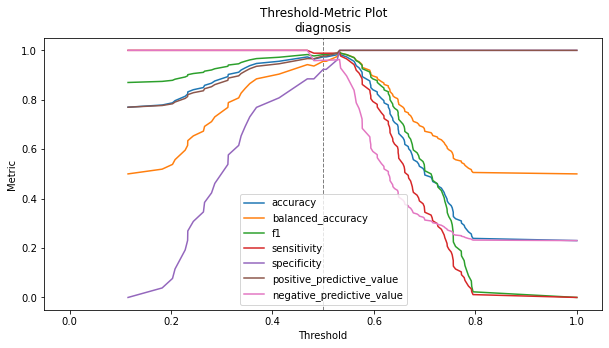

In [30]:
figures['threshold']

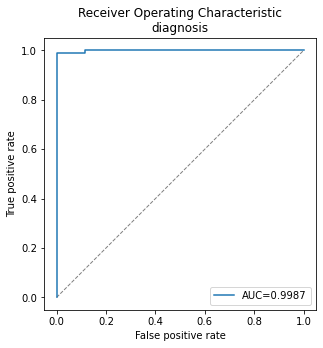

In [21]:
figures['roc_curve']

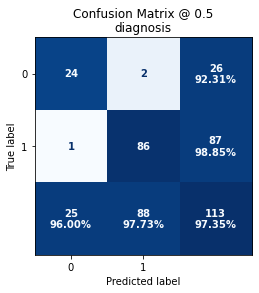

In [28]:
figures['confusion_matrix']

There are similar ways to plot training history and feature importance. Check out [plots.md](https://github.com/risc-mi/catabra/doc/plots.md) for details.

## Create Interactive Plots with plotly

So far, all plots were created with the default [Matplotlib](https://matplotlib.org/) backend. CaTabRa can be instructed to produce *interactive plots* using the [plotly](https://plotly.com/python/) backend with only a few lines of code.

Since plotly is not installed by default, we have to install it manually (using either pip or conda):

In [31]:
!pip install plotly==5.7.0

For automatically creating interactive plots during all stages of CaTabRa's data analysis workflow we can update the config dict passed to the initial call to `analyze()`. The config dict can be updated by either passing a dict or the path to a JSON file containing such a dict; the latter is especially useful on the command line.

**NOTE**<br>
For more information about the possible config parameters and their meaning, please refer to [config.md](https://github.com/risc-mi/catabra/doc/config.md).

When executing the following cell you will be asked whether the output directory, which already exists because of the previous call to `analyze()` above, shall be deleted. Just enter "y".

In [32]:
analyze(
    X,
    classify='diagnosis',     # name of column containing classification target
    split='train',            # name of column containing information about the train-test split (optional)
    time=1,                   # time budget for hyperparameter tuning, in minutes (optional)
    out='plotting_example',
    config={
        'static_plots': True,         # whether to create static plots; True by default
        'interactive_plots': True     # whether to create interactive plots; False by default
    }
)

Output folder "/mnt/c/Users/amaletzk/Documents/CaTabRa/catabra/examples/plotting_example" already exists. Delete? [y/n] y
[CaTabRa] ### Analysis started at 2023-02-07 16:34:49.523708
[CaTabRa] Saving descriptive statistics completed
[CaTabRa] Using AutoML-backend auto-sklearn for binary_classification
[CaTabRa] Successfully loaded the following auto-sklearn add-on module(s): xgb


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[CaTabRa] New ensemble fitted:
    ensemble_val_roc_auc: 0.980337
    n_constituent_models: 1
    total_elapsed_time: 00:06
[CaTabRa] New model #1 trained:
    val_roc_auc: 0.980337
    val_accuracy: 0.927152
    val_balanced_accuracy: 0.928416
    train_roc_auc: 1.000000
    type: random_forest
    total_elapsed_time: 00:06
[CaTabRa] New ensemble fitted:
    ensemble_val_roc_auc: 0.994744
    n_constituent_models: 1
    total_elapsed_time: 00:06
[CaTabRa] New model #2 trained:
    val_roc_auc: 0.994744
    val_accuracy: 0.947020
    val_balanced_accuracy: 0.947717
    train_roc_auc: 0.996970
    type: passive_aggressive
    total_elapsed_time: 00:06
[CaTabRa] New ensemble fitted:
    ensemble_val_roc_auc: 0.994744
    n_constituent_models: 1
    total_elapsed_time: 00:07
[CaTabRa] New model #3 trained:
    val_roc_auc: 0.970098
    val_accuracy: 0.920530
    val_balanced_accuracy: 0.915458
    train_roc_auc: 1.000000
    type: gradient_boosting
    total_elapsed_time: 00:07
[CaTabRa] 

[CaTabRa] Final training statistics:
    n_models_trained: 27
    ensemble_val_roc_auc: 0.9980065241029358
[CaTabRa] Creating shap explainer
[CaTabRa] Initialized out-of-distribution detector of type Autoencoder
[CaTabRa] Fitting out-of-distribution detector...
Iteration 1, loss = 0.06144245
Iteration 2, loss = 0.03573245
Iteration 3, loss = 0.02387765
Iteration 4, loss = 0.01656007
Iteration 5, loss = 0.01310687
Iteration 6, loss = 0.01272642
Iteration 7, loss = 0.01284678
Iteration 8, loss = 0.01251137
Iteration 9, loss = 0.01204069
Iteration 10, loss = 0.01171716
Iteration 11, loss = 0.01147114
Iteration 12, loss = 0.01138949
Iteration 13, loss = 0.01136117
Iteration 14, loss = 0.01135147
Iteration 15, loss = 0.01131822
Iteration 16, loss = 0.01131514
Iteration 17, loss = 0.01125710
Iteration 18, loss = 0.01125870
Iteration 19, loss = 0.01128076
Iteration 20, loss = 0.01125129
Iteration 21, loss = 0.01124904
Iteration 22, loss = 0.01129953
Iteration 23, loss = 0.01122279
Iteration 2

Looking at `eval/train/` and `eval/not_train/` you will now find folders `static_plots` (as before), but also `interactive_plots`. The latter contain HTML files with plotly-generated interactive plots that can be viewed in any modern browser.

In addition, it is also possible to create interactive plots directly in Python. Continuing the example from above, all we have to do is pass `interactive=True` to function `plot_results()`:

In [33]:
figures = plot_results(
    loader.path / 'eval/not_train/predictions.xlsx',    # table with predictions for all samples
    loader.path / 'eval/not_train/metrics.xlsx',        # table with performance metrics
    loader.get_encoder(),                               # data encoder
    interactive=True
)

The output is again a dict mapping keys to figures, but this time the figures are plotly figure instances:

In [36]:
figures['threshold']

In [37]:
figures['roc_curve']

In [38]:
figures['confusion_matrix']

**NOTE**<br>
Every static Matplotlib figure that can be created in CaTabRa's main data analysis workflow has an interactive plotly analogue, and vice versa. This includes training history plots, model performance plots and feature importance plots.